In [58]:
import jieba
import jieba.analyse
import numpy as np
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
plt.rcParams['font.sans-serif']=['SimHei'] # 設定 matplotlib 的中文字體
jieba.load_userdict("C:/Python36/Lib/site-packages/jieba/dict.txt")   # 設定 jiebe 使用斷詞的語料庫

In [60]:
movies_comments = pd.read_csv("movies_comments_revised.csv")
neg = movies_comments[(movies_comments["star"] == 1)]  # 取出所有一顆星的評論
pos = movies_comments[(movies_comments["star"] == 5)]  # 取出所有五顆星的評論
neg.head()

,comments,star,movie_cht,movie_eng
0,完全走味了............為什麼創造者會長得像人??????????????????...,1,變形金剛5：最終騎士,Transformers: The Last Knight\n
1,真的很無聊,1,變形金剛5：最終騎士,Transformers: The Last Knight\n
3,難得能看到睡著的片,1,變形金剛5：最終騎士,Transformers: The Last Knight\n
6,真難看到極點!!!,1,變形金剛5：最終騎士,Transformers: The Last Knight\n
9,難看，智障電影,1,變形金剛5：最終騎士,Transformers: The Last Knight\n


In [61]:
neg_text = ''.join(neg["comments"])  # 將 list of string 轉變成一個大字串
pos_text = ''.join(pos["comments"])  # 將 list of string 轉變成一個大字串

In [62]:
jieba.add_word('不好看') # 加上不好看這個詞

In [63]:
neg_list = jieba.cut(neg_text)  # 將大字串斷詞後變成一個 list
pos_list = jieba.cut(pos_text)  # 將大字串斷詞後變成一個 list

In [64]:
with open('C:/Python36/Lib/site-packages/jieba/stop_words.txt','r', encoding='utf-8') as f:
    stopwords = f.readlines()
    stopwords = [x.replace("\n","") for x in stopwords]
    
neg_text_filtered = ' '.join([word for word in neg_list if word not in stopwords]) #將停止詞濾掉
pos_text_filtered = ' '.join([word for word in pos_list if word not in stopwords]) #將停止詞濾掉

In [65]:
neg_text_list = [item for item in neg_text_filtered.split(" ") if item.split()] #保留非空白的詞
pos_text_list = [item for item in pos_text_filtered.split(" ") if item.split()] #保留非空白的詞

In [66]:
neg_counter = Counter(neg_text_list) # Counter 可以幫忙對 list 做記數
print(neg_counter.most_common(20))

[('看', 84), ('劇情', 68), ('垃圾', 60), ('都', 50), ('真的', 45), ('不', 44), ('難看', 39), ('去', 39), ('電影', 35), ('爛片', 33), ('很', 28), ('好', 25), ('特效', 25), ('變形金剛', 24), ('工讀生', 23), ('睡著', 22), ('沒', 22), ('留言', 22), ('還沒看', 22), ('人', 21)]


In [67]:
pos_counter = Counter(pos_text_list) # Counter 可以幫忙對 list 做記數
print(pos_counter.most_common(20))

[('看', 62), ('好看', 41), ('很', 29), ('劇情', 28), ('特效', 26), ('去', 22), ('電影', 21), ('都', 20), ('不', 18), ('片', 17), ('人', 16), ('難看', 14), ('說', 14), ('還', 14), ('不錯', 13), ('真的', 12), ('變形金剛', 12), ('沒', 12), ('爽片', 10), ('場面', 9)]


In [68]:
mask_use = "circle_mask.png" # 可以改成 "Alice_mask.jpg"，在重新執行程式，看看文字雲會怎麼變化
mask = np.array(Image.open(mask_use))

c:\python36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


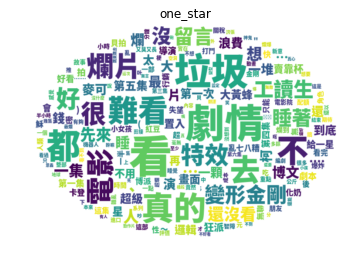

In [72]:
wordcloud = WordCloud(background_color="white", # 設定背景顏色
                      mask=mask, # 決定圖片的形狀
                      max_font_size=100, # 字體大小
                      font_path='NotoSansCJKtc-Black.otf', # 設定字型
                      random_state=38).fit_words(neg_counter) # 丟入文字

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("one_star")
plt.axis("off")
plt.savefig("one_star_wordcloud.png", dpi = 700)
plt.show()

c:\python36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


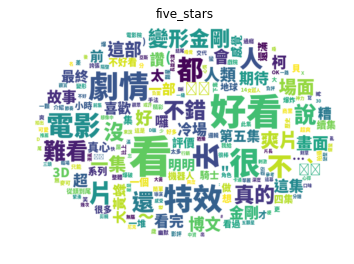

In [73]:
wordcloud = WordCloud(background_color="white",
                      mask=mask, max_font_size=100, 
                      font_path='NotoSansCJKtc-Black.otf', 
                      random_state=38).fit_words(pos_counter)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("five_stars")
plt.axis("off")
plt.savefig("five_star_wordcloud.png", dpi = 700)
plt.show()

In [74]:
jieba.analyse.set_stop_words(stop_words_path='C:/Python36/Lib/site-packages/jieba/stop_words.txt')

In [75]:
pos_words = jieba.analyse.extract_tags(pos_text, 500, withWeight=True)
print("TF-IDF 正面評價詞: ", pos_words[:20])

TF-IDF 正面評價詞:  [('劇情', 0.267145642522905), ('好看', 0.24855976283443734), ('特效', 0.20247096254196328), ('電影', 0.20035923189217877), ('難看', 0.1335728212614525), ('不錯', 0.12403190545706305), ('變形金剛', 0.11449098965267358), ('爽片', 0.09540915804389466), ('場面', 0.08586824223950519), ('一集', 0.07732374375418995), ('這部', 0.07632732643511572), ('畫面', 0.06678641063072625), ('人類', 0.06678641063072625), ('博文', 0.0574846912810056), ('金剛', 0.05724549482633679), ('冷場', 0.05724549482633679), ('這集', 0.05724549482633679), ('真的', 0.053954435476807665), ('喜歡', 0.04770457902194733), ('第五集', 0.04770457902194733)]


In [76]:
neg_words = jieba.analyse.extract_tags(neg_text, 500, withWeight=True)
print("TF-IDF 負面評價詞: ", neg_words[:20])

TF-IDF 負面評價詞:  [('劇情', 0.3435858792042265), ('垃圾', 0.20261743891648354), ('難看', 0.19705660719065932), ('電影', 0.17684567311982247), ('爛片', 0.16674020608440404), ('變形金剛', 0.12126560442502113), ('工讀生', 0.1162128709073119), ('睡著', 0.11116013738960269), ('還沒看', 0.11116013738960269), ('真的', 0.10715063554380812), ('先來', 0.10610740387189348), ('特效', 0.10310167926437025), ('一集', 0.0864490639408284), ('留言', 0.08554705845137785), ('麥可', 0.07073826924792899), ('博文', 0.06958417406120035), ('一顆', 0.06568553573021978), ('浪費', 0.06568553573021978), ('超級', 0.055580068694801345), ('第五集', 0.055580068694801345)]


c:\python36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


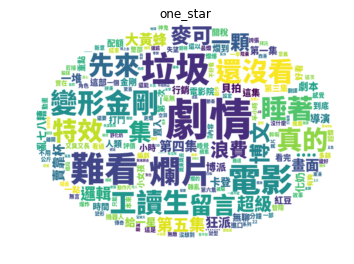

In [78]:
# 經過 TF-IDF 篩選過之後的文字雲
wordcloud = WordCloud(background_color="white", 
                      mask=mask,
                      max_font_size=100,
                      font_path='NotoSansCJKtc-Black.otf', 
                      random_state=8).fit_words(dict(neg_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("one_star")
plt.axis("off")
plt.savefig("one_star_wordcloud_tfidf.png", dpi = 700)
plt.show()

c:\python36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


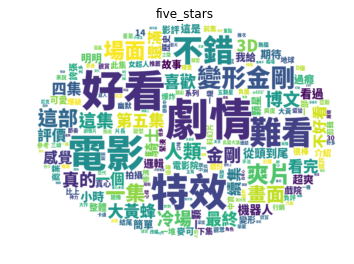

In [80]:
# 經過 TF-IDF 篩選過之後的文字雲
wordcloud = WordCloud(background_color="white",
                      mask=mask,
                      max_font_size=100,
                      font_path='NotoSansCJKtc-Black.otf', 
                      random_state=8).fit_words(dict(pos_words)) 

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("five_stars")
plt.axis("off")
plt.savefig("five_star_wordcloud_tfidf.png", dpi = 700)
plt.show()